In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from datapackage import Package
import scipy.stats as st
from scipy.stats import linregress #---added
from sklearn import datasets
import numpy as np
import seaborn as sns
import json
plt.style.use('seaborn')
import warnings #----added
warnings.filterwarnings('ignore')

In [3]:
global_suicide_data = "master.csv"
global_suicide_data = pd.read_csv(global_suicide_data)

In [4]:
global_suicide_data.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
#global_suicide_data.info()
global_suicide_data.count()

country               27820
year                  27820
sex                   27820
age                   27820
suicides_no           27820
population            27820
suicides/100k pop     27820
country-year          27820
HDI for year           8364
 gdp_for_year ($)     27820
gdp_per_capita ($)    27820
generation            27820
dtype: int64

In [6]:
global_suicide_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
#clean columns
global_suicide_data=global_suicide_data.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age'
                     ,'suicides_no':'SuicidesNo','population':'Population',
                      'suicides/100k pop':'Suicides/100kPop','country-year':'Country/Year',
                      'HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYear($)',
                      'gdp_per_capita ($)':'GdpPerCapital($)','generation':'Generation'})

In [8]:
#checking for null values
global_suicide_data.isnull().any()

Country             False
Year                False
Gender              False
Age                 False
SuicidesNo          False
Population          False
Suicides/100kPop    False
Country/Year        False
HDIForYear           True
GdpForYear($)       False
GdpPerCapital($)    False
Generation          False
dtype: bool

In [9]:
#count amount of null values
global_suicide_data.isnull().sum()

Country                 0
Year                    0
Gender                  0
Age                     0
SuicidesNo              0
Population              0
Suicides/100kPop        0
Country/Year            0
HDIForYear          19456
GdpForYear($)           0
GdpPerCapital($)        0
Generation              0
dtype: int64

In [10]:
#global_suicide_data.reset_index(inplace=True)
#global_suicide_data

In [11]:
#Dropping HDIForYear since there are thousands of null values
global_suicide_data.drop('HDIForYear', axis=1, inplace = True)

In [12]:
#Dropping Country/Year since country and year exist as 2 separate columns
global_suicide_data.drop('Country/Year', axis=1, inplace=True)

In [13]:
#Keeping 1990-2016 based on value counts
global_suicide_data = global_suicide_data.loc[(global_suicide_data.Year >= 1990)] # & (global_suicide_data.Year < 2016)]
global_suicide_data

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides/100kPop,GdpForYear($),GdpPerCapital($),Generation
36,Albania,1992,male,35-54 years,12,343800,3.49,"709,452,584",251,Boomers
37,Albania,1992,male,15-24 years,9,263700,3.41,"709,452,584",251,Generation X
38,Albania,1992,male,55-74 years,5,159500,3.13,"709,452,584",251,Silent
39,Albania,1992,male,25-34 years,7,245500,2.85,"709,452,584",251,Boomers
40,Albania,1992,female,15-24 years,7,292400,2.39,"709,452,584",251,Generation X
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [14]:
global_suicide_data["Year"].value_counts()

2009    1068
2010    1056
2001    1056
2011    1032
2003    1032
2002    1032
2007    1032
2000    1032
2008    1020
2006    1020
2004    1008
2005    1008
1999     996
2012     972
2013     960
1998     948
1995     936
2014     936
1996     924
1997     924
1994     816
1993     780
1992     780
1990     768
1991     768
2015     744
2016     160
Name: Year, dtype: int64

In [15]:
#2016 appears to be incomplete. We decided to drop this year.
global_suicide_data = global_suicide_data[global_suicide_data.Year != 2016]

In [16]:
#here we have dropped unneeded columns, as well as filtered the data
global_suicide_data
#global_suicide_data.to_csv('TryingSomething.csv')

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides/100kPop,GdpForYear($),GdpPerCapital($),Generation
36,Albania,1992,male,35-54 years,12,343800,3.49,"709,452,584",251,Boomers
37,Albania,1992,male,15-24 years,9,263700,3.41,"709,452,584",251,Generation X
38,Albania,1992,male,55-74 years,5,159500,3.13,"709,452,584",251,Silent
39,Albania,1992,male,25-34 years,7,245500,2.85,"709,452,584",251,Boomers
40,Albania,1992,female,15-24 years,7,292400,2.39,"709,452,584",251,Generation X
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [17]:

#create new data frame grouped by year to check
yearlyStats = global_suicide_data.groupby('Year').sum()
yearlyStats

,SuicidesNo,Population,Suicides/100kPop,GdpPerCapital($)
Year,,,,
1990,193361,1466620100,9878.75,7531260
1991,198020,1489988384,10321.06,7782096
1992,211473,1569539447,10528.88,8195232
1993,221565,1530416654,10790.29,8231796
1994,232063,1548749372,11483.79,9438756
1995,243544,1591559103,14660.26,11858508
1996,246725,1662267662,14142.21,11600736
1997,240745,1702991519,13817.83,11398596
1998,249591,1725181351,14150.72,11506728


In [18]:
#Checking countries for bad values

countryStats = global_suicide_data.groupby('Country').sum()
countryStats.to_csv('CountryNumbers.csv')
countryStats

,Year,SuicidesNo,Population,Suicides/100kPop,GdpPerCapital($)
Country,,,,,
Albania,456228,1766,54048467,827.05,462012
Antigua and Barbuda,528612,11,1687321,179.14,3045792
Argentina,624780,71060,897040831,3177.07,2722164
Armenia,576672,1838,74948140,935.65,520548
Aruba,336720,101,1259677,1596.52,4069236
...,...,...,...,...,...
United Arab Emirates,144540,622,36502275,94.89,3035664
United Kingdom,624780,112935,1472666135,2244.91,11042256
United States,624780,882286,6928363201,4202.79,13292268


In [19]:
#We decided to drop countries with suicides under 40 (throughout combined years) to avoid potential outliers

countryStats = global_suicide_data[global_suicide_data['SuicidesNo'] > 10] #---- had to change this
countryStats.to_csv('CleanCountryStats')

countryStats

global_suicide_data = countryStats
global_suicide_data

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides/100kPop,GdpForYear($),GdpPerCapital($),Generation
36,Albania,1992,male,35-54 years,12,343800,3.49,"709,452,584",251,Boomers
48,Albania,1993,male,15-24 years,18,243300,7.40,"1,228,071,038",437,Generation X
61,Albania,1994,male,55-74 years,11,171400,6.42,"1,985,673,798",697,Silent
72,Albania,1995,male,25-34 years,13,232900,5.58,"2,424,499,009",835,Generation X
75,Albania,1995,female,15-24 years,13,283500,4.59,"2,424,499,009",835,Generation X
...,...,...,...,...,...,...,...,...,...,...
27814,Uzbekistan,2014,female,25-34 years,162,2735238,5.92,"63,067,077,179",2309,Millenials
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [20]:
#global_suicide_data.reset_index(level=0, inplace=True)
global_suicide_data.sample(10)

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides/100kPop,GdpForYear($),GdpPerCapital($),Generation
24491,Sweden,1997,male,25-34 years,125,643100,19.44,"264,477,727,279",31821,Generation X
6562,Croatia,2011,male,35-54 years,148,616577,24.00,"62,375,044,443",14890,Generation X
27448,Uruguay,2006,male,75+ years,59,73133,80.67,"19,579,457,966",6362,Silent
18937,Philippines,1999,male,55-74 years,79,2287574,3.45,"82,995,145,792",1262,Silent
20975,Russian Federation,1992,male,25-34 years,7958,11773600,67.59,"460,290,556,901",3333,Boomers
21035,Russian Federation,1997,male,25-34 years,8222,10242100,80.28,"404,926,534,140",2907,Generation X
1694,Australia,2008,male,15-24 years,228,1560974,14.61,"1,052,584,601,611",52315,Millenials
25627,Trinidad and Tobago,2011,male,25-34 years,25,119254,20.96,"25,433,011,405",20557,Millenials
23700,Spain,1999,female,75+ years,171,1752702,9.76,"633,194,118,900",16756,G.I. Generation
10281,Greece,2006,female,25-34 years,12,821976,1.46,"273,317,737,047",25739,Generation X


In [21]:
global_suicide_data.Country.unique()

array(['Albania', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador',
       'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Mauritius', 'Mexico', 'Montenegro', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Norway', 'Panama', 'Paraguay', 'Philippines',
       'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea',
       'Romania', 'Russian Federation', 'Serbia', 'Singapore', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Suriname',
       'Sweden', 'Switzerland'

In [22]:
#create lists of countries per continent
europe = ['Albania', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'] 
asia = ['Armenia', 'Bahrain', 'Israel', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Macau', 'Maldives', 'Mongolia', 'Oman', 'Philippines', 'Qatar', 'Republic of Korea', 'Singapore', 'Sri Lanka', 'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan']
northamerica = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'El Salvador', 'Grenada', 'Guatemala', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and Grenadines', 'United States']
southamerica =  ['Argentina', 'Aruba', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Suriname', 'Trinidad and Tobago', 'Uruguay']
africa = ['Cabo Verde', 'Mauritius', 'Seychelles', 'South Africa'] 
australiaoceania = ['Australia', 'Fiji', 'Kiribati', 'New Zealand']

In [23]:
#move these to a dictionary of continents
continents = {country: 'Asia' for country in asia}
continents.update({country: 'Europe' for country in europe})
continents.update({country: 'Africa' for country in africa})
continents.update({country: 'North_America' for country in northamerica})
continents.update({country: 'South_America' for country in southamerica})
continents.update({country: 'Australia_Oceania' for country in australiaoceania})

In [24]:
#map continents to countries
global_suicide_data['Continent'] = global_suicide_data['Country'].map(continents)

In [25]:
global_suicide_data

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides/100kPop,GdpForYear($),GdpPerCapital($),Generation,Continent
36,Albania,1992,male,35-54 years,12,343800,3.49,"709,452,584",251,Boomers,Europe
48,Albania,1993,male,15-24 years,18,243300,7.40,"1,228,071,038",437,Generation X,Europe
61,Albania,1994,male,55-74 years,11,171400,6.42,"1,985,673,798",697,Silent,Europe
72,Albania,1995,male,25-34 years,13,232900,5.58,"2,424,499,009",835,Generation X,Europe
75,Albania,1995,female,15-24 years,13,283500,4.59,"2,424,499,009",835,Generation X,Europe
...,...,...,...,...,...,...,...,...,...,...,...
27814,Uzbekistan,2014,female,25-34 years,162,2735238,5.92,"63,067,077,179",2309,Millenials,Asia
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X,Asia
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z,Asia
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z,Asia


In [26]:
data_per_year = global_suicide_data.groupby('Year').sum()['SuicidesNo']
data_per_year

Year
1990    192648
1991    197355
1992    210733
1993    220827
1994    231205
1995    242625
1996    245766
1997    239845
1998    248669
1999    255141
2000    254858
2001    249637
2002    255141
2003    255164
2004    239841
2005    233474
2006    232463
2007    232320
2008    234522
2009    242460
2010    237578
2011    235455
2012    229167
2013    222368
2014    222100
2015    202970
Name: SuicidesNo, dtype: int64

In [27]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.close()

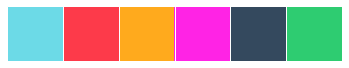

In [28]:
flatui = ["#6cdae7", "#fd3a4a", "#ffaa1d", "#ff23e5", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

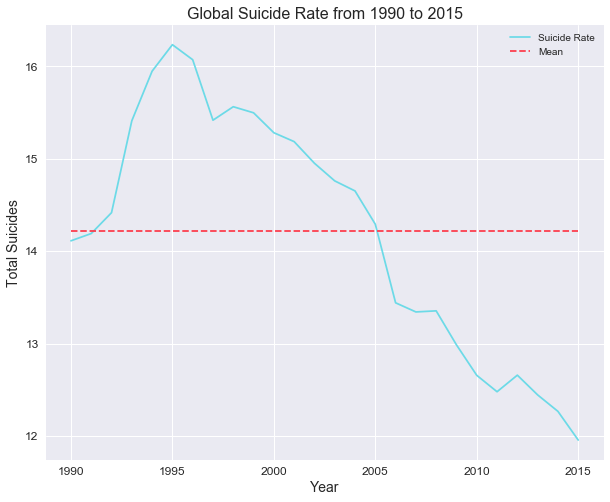

In [29]:
#----adding to observe overall trends from 1990-2015
curr = global_suicide_data.dropna().groupby(['Year']).sum().reset_index()
curr['per_100k'] = curr['SuicidesNo'] * 100000 / curr['Population']
plt.figure(figsize = (10,8))
plt.plot(curr['Year'], curr['per_100k'], label = "Suicide Rate")
plt.plot(curr['Year'], [curr['per_100k'].mean()] * len(curr), '--', label = "Mean")
plt.title("Global Suicide Rate from 1990 to 2015", fontsize = 16)
plt.xlabel("Year", fontsize = 14)
plt.xticks(fontsize=12)
plt.ylabel("Total Suicides", fontsize = 14)
plt.yticks(fontsize=12)
plt.legend()
plt.savefig('Graphs/1990to2015LineChart.png', transparent=True) 
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

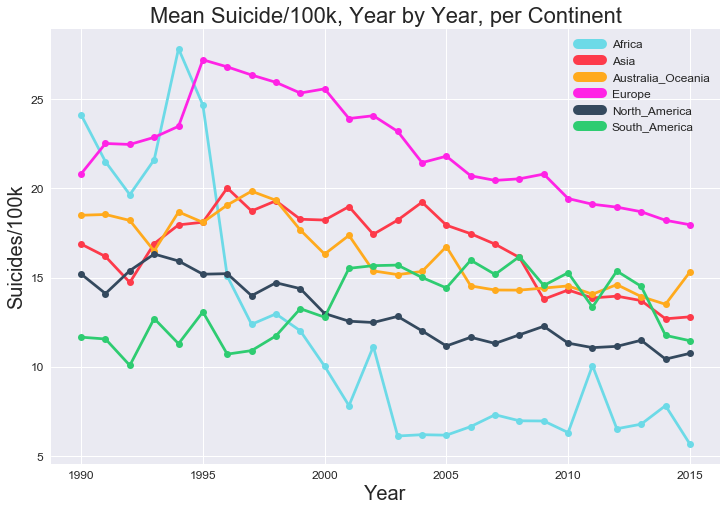

In [30]:
#----adding to observe overall trends from 1990-2015

curr2 = global_suicide_data.groupby(['Continent','Year'],sort=True,as_index=False)['Suicides/100kPop'].mean()
by_cont = curr2.groupby('Continent')
 
for name, group in by_cont:
    plt.plot(group['Year'], group['Suicides/100kPop'], label=name, marker ='o', linewidth=2.75)

plt.title('Mean Suicide/100k, Year by Year, per Continent', fontsize = 22)
plt.ylabel('Suicides/100k', fontsize = 20)
plt.yticks(fontsize = 12) 
#plt.ylim(0, max(group['Suicides/100kPop'])+8) 
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 12)
leg = plt.legend(fontsize = 12)
for line in leg.get_lines():
    line.set_linewidth(10)
plt.savefig('Graphs/1990to2015Continents.png', transparent=True) 
plt.show



In [31]:
#group data by continent
data_per_continent = global_suicide_data.groupby('Continent').mean()
data_per_continent

,Year,SuicidesNo,Population,Suicides/100kPop,GdpPerCapital($)
Continent,,,,,
Africa,2003.948000,37.692000,2.376556e+06,10.387400,5697.548000
Asia,2002.645759,458.288311,3.008875e+06,16.643026,15091.903421
Australia_Oceania,2002.067941,151.859873,1.006349e+06,16.366815,30981.016985
Europe,2002.798296,412.211796,2.090764e+06,22.322342,23121.182962
North_America,2003.047468,607.032700,5.605201e+06,12.878196,16774.870781
South_America,2003.014859,198.769688,3.374446e+06,13.633858,6448.447251


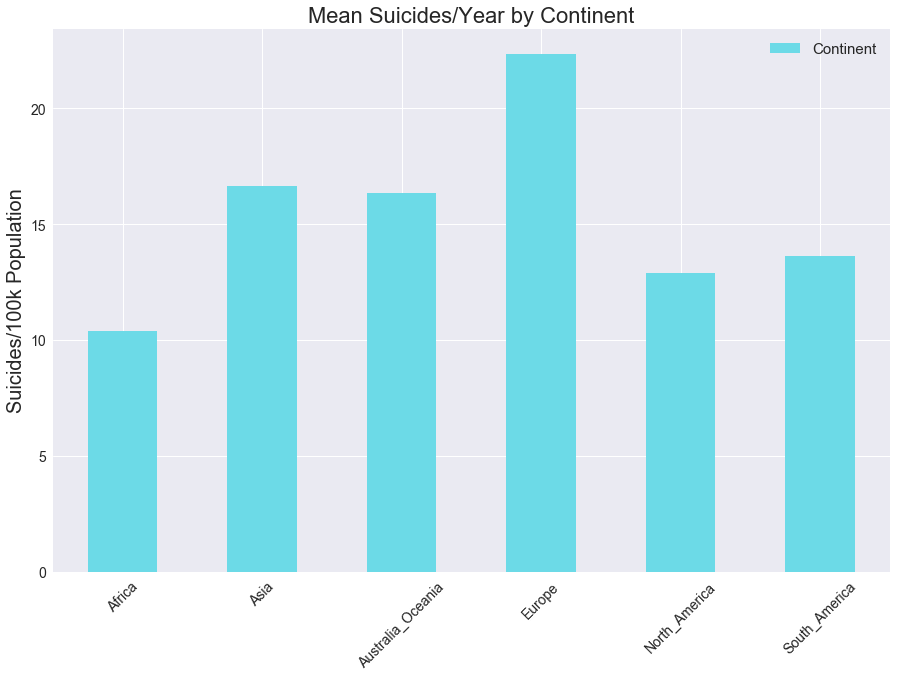

In [32]:
#plot mean suicides/year by continent
ax = data_per_continent['Suicides/100kPop'].plot(kind='bar', figsize=(15, 10), fontsize=14)
plt.title('Mean Suicides/Year by Continent', fontsize = 22)
ax.set_xlabel('') #---- added this
plt.xticks(rotation=45) #---- added this
ax.set_ylabel("Suicides/100k Population", fontsize=20)
plt.legend(['Continent'], prop={'size':15})
plt.savefig('Graphs/BarGraphGlobalSuicideRate.png',transparent = True) #----saving image
plt.show()

In [33]:
dftesting = global_suicide_data[['Continent','Year','Suicides/100kPop']]
dftesting

,Continent,Year,Suicides/100kPop
36,Europe,1992,3.49
48,Europe,1993,7.40
61,Europe,1994,6.42
72,Europe,1995,5.58
75,Europe,1995,4.59
...,...,...,...
27814,Asia,2014,5.92
27815,Asia,2014,2.96
27817,Asia,2014,2.17
27818,Asia,2014,1.67


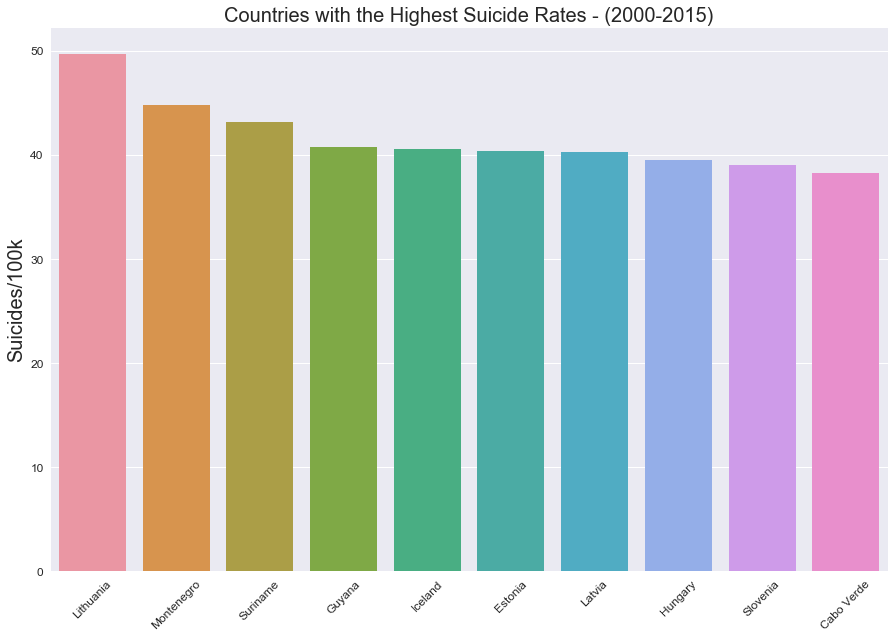

In [34]:
#plotting countries with the highest suicide rate
data_suicide_mean = global_suicide_data['Suicides/100kPop'].groupby(global_suicide_data.Country).mean().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.barplot(data_suicide_mean.head(10).index,data_suicide_mean.head(10))
plt.ylabel('Suicides/100k', fontsize = 20)
#plt.xlabel('Country', fontsize = 20) -- remove?
plt.xlabel('')
plt.title('Countries with the Highest Suicide Rates - (2000-2015)', fontsize = 20) #----added this
plt.xticks(fontsize = 12,rotation=45) #----added this; do we want to increase font size
plt.yticks(fontsize = 12) #----added this
plt.savefig('Graphs/BarGraphCountHighSuicideRate.png', transparent=True) #----saving image
plt.show()

In [35]:
#creating sub frame for USA only 
dfUSA = global_suicide_data[global_suicide_data.Country == 'United States']
usa_by_year = dfUSA.groupby('Year').sum()

In [36]:
dfUSA.corr(method ='pearson')

,Year,SuicidesNo,Population,Suicides/100kPop,GdpPerCapital($)
Year,1.000000,0.111635,0.185549,-0.032763,0.995510
SuicidesNo,0.111635,1.000000,0.567700,0.622911,0.109706
Population,0.185549,0.567700,1.000000,-0.132053,0.185005
Suicides/100kPop,-0.032763,0.622911,-0.132053,1.000000,-0.034364
GdpPerCapital($),0.995510,0.109706,0.185005,-0.034364,1.000000


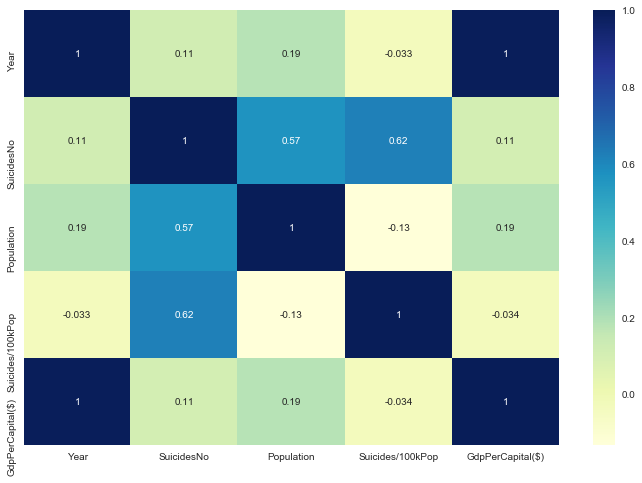

In [37]:
sns.heatmap(dfUSA.corr(method = 'pearson'),cmap='YlGnBu', annot=True)

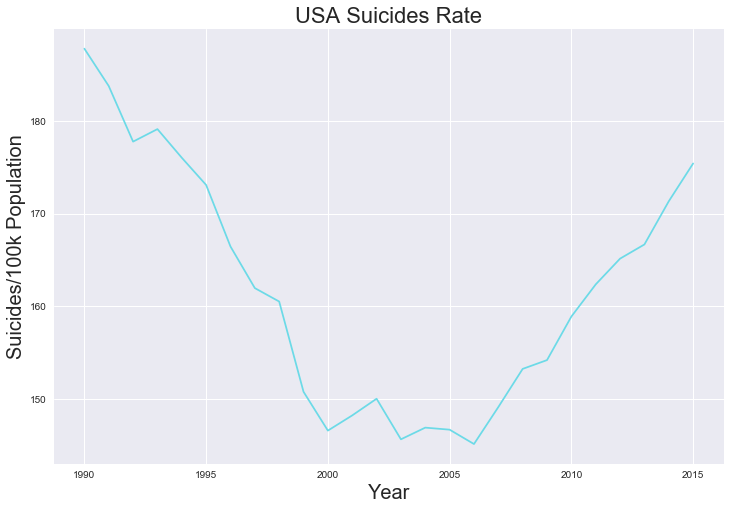

In [38]:
usa_by_year['Suicides/100kPop'].plot()
plt.title('USA Suicides Rate', fontsize = 22)
plt.ylabel('Suicides/100k Population', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.savefig('Graphs/USAratesLineGraph.png') #----saving image
plt.show()

In [39]:
#new data frame with only data from 2015
df2015 = global_suicide_data[global_suicide_data.Year == 2015]

In [40]:
df2015 = df2015[['Country','Suicides/100kPop','GdpPerCapital($)', 'Continent']]

In [41]:
df2015

,Country,Suicides/100kPop,GdpPerCapital($),Continent
948,Argentina,34.38,14981,South_America
949,Argentina,18.74,14981,South_America
950,Argentina,14.31,14981,South_America
951,Argentina,14.13,14981,South_America
952,Argentina,12.25,14981,South_America
...,...,...,...,...
27549,Uruguay,10.58,16696,South_America
27550,Uruguay,10.38,16696,South_America
27551,Uruguay,9.91,16696,South_America
27552,Uruguay,8.63,16696,South_America


In [42]:
df2015check = df2015.groupby('Country').sum()

In [43]:
df2015check['GdpPerCapital($)'] = df2015check['GdpPerCapital($)'].div(2)

In [44]:
df2015check.reset_index(level=0, inplace=True)
df2015check

,Country,Suicides/100kPop,GdpPerCapital($)
0,Argentina,112.13,89886.0
1,Armenia,30.69,5662.5
2,Australia,153.22,303280.0
3,Austria,194.13,232420.0
4,Belgium,196.03,214150.0
5,Brazil,77.45,56586.0
6,Chile,146.97,81009.5
7,Colombia,69.00,36036.0
8,Croatia,223.10,49404.0
9,Cuba,193.68,40220.0


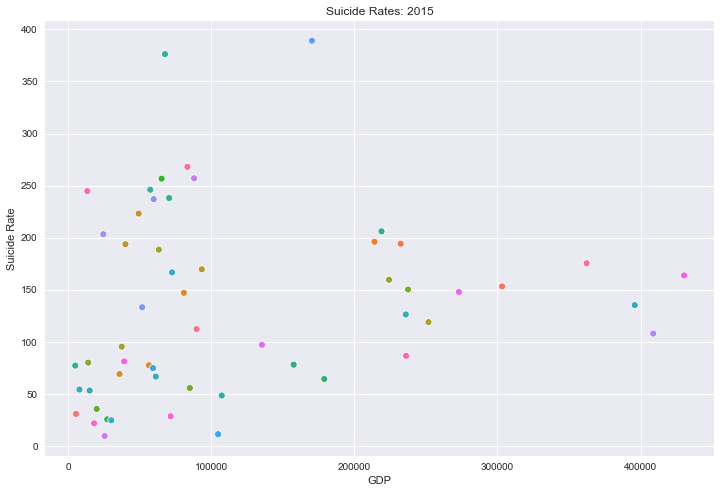

In [45]:
sns.scatterplot(x='GdpPerCapital($)', y='Suicides/100kPop', data=df2015check, hue='Country',legend=False) 
plt.title('Suicide Rates: 2015')
plt.ylabel('Suicide Rate')
plt.xlabel('GDP')
plt.show()
# Checking data for rates --- leave this??

In [46]:
df2015.shape

(498, 4)

In [47]:
dfcont = df2015.groupby(['Continent','Country'],sort=True,as_index=False)['Suicides/100kPop','GdpPerCapital($)'].sum()

In [48]:
dfcont['GdpPerCapital($)'] = dfcont['GdpPerCapital($)'] #.div(2) #--- why are we dividing by 2???
dfcont.reset_index(level=0, inplace=True)

In [49]:
dfcont

,index,Continent,Country,Suicides/100kPop,GdpPerCapital($)
0,0,Africa,Mauritius,53.15,30375
1,1,Africa,South Africa,9.45,51224
2,2,Asia,Armenia,30.69,11325
3,3,Asia,Israel,64.21,358137
4,4,Asia,Japan,206.04,438120
5,5,Asia,Kazakhstan,238.02,141408
6,6,Asia,Kyrgyzstan,77.11,10280
7,7,Asia,Qatar,11.18,209811
8,8,Asia,Republic of Korea,389.14,340920
9,9,Asia,Singapore,107.86,817660


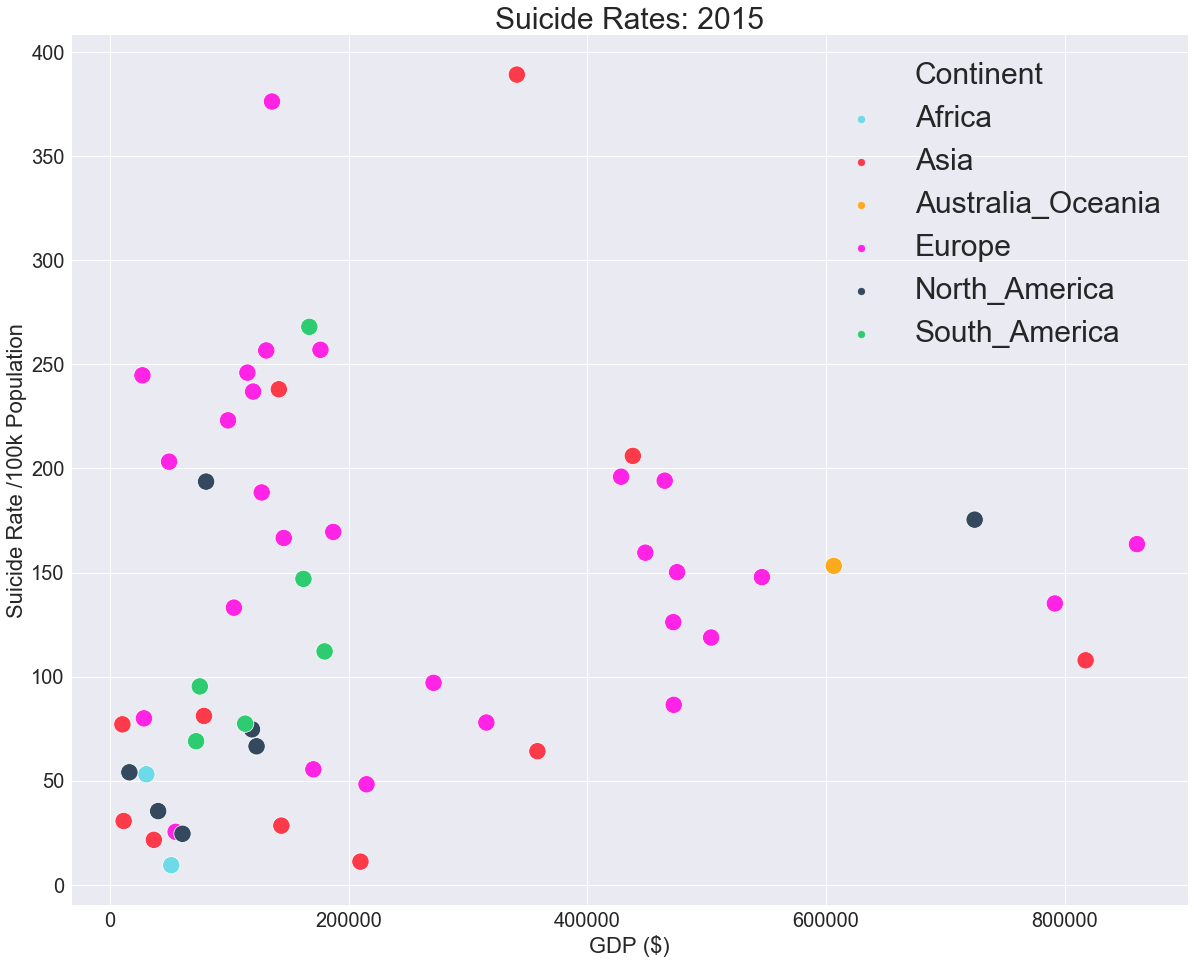

In [50]:
#plot suicide rate vs gdp
plt.figure(figsize=(20,16))
sns.scatterplot(x='GdpPerCapital($)',s=300, y='Suicides/100kPop',data=dfcont, hue='Continent') 
plt.title('Suicide Rates: 2015', fontsize= 30)
plt.ylabel('Suicide Rate /100k Population', fontsize = 22)
plt.xlabel('GDP ($)', fontsize = 22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=1, prop={'size': 30})
plt.savefig('Graphs/ScatterSuicideRates2015.png') #----saving image

plt.show()

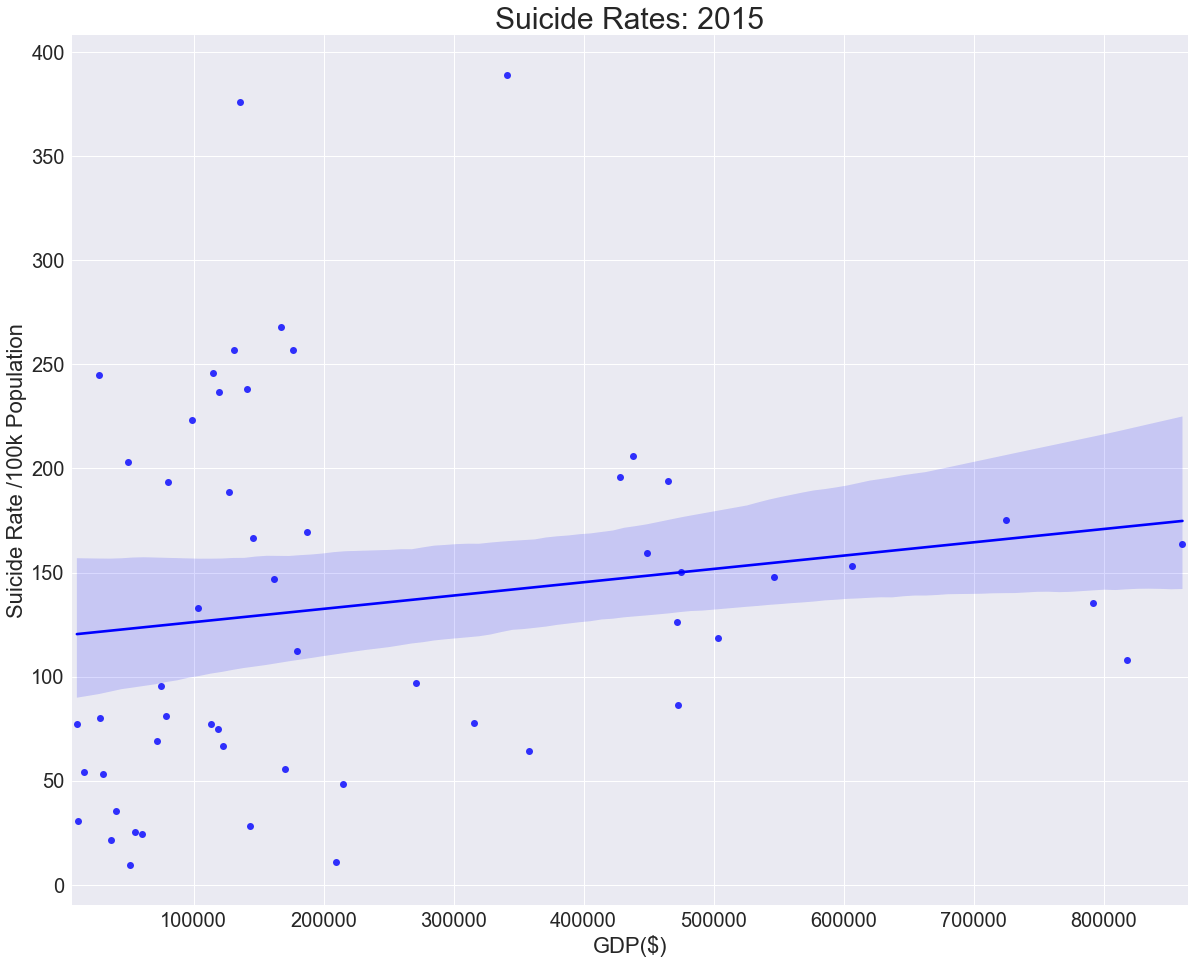

In [51]:
#regression plot for suicide rates vs gdp --- fix

plt.figure(figsize=(20,16))
sns.regplot(x="GdpPerCapital($)", y="Suicides/100kPop", data=dfcont, color = 'b')
plt.title('Suicide Rates: 2015', fontsize= 30)
plt.ylabel('Suicide Rate /100k Population', fontsize = 22)
plt.xlabel('GDP($)', fontsize = 22)
plt.xticks(fontsize=20)
plt.xlim(min(dfcont["GdpPerCapital($)"]) - 4000, max(dfcont["GdpPerCapital($)"])+4000)
plt.yticks(fontsize=20)
#plt.savefig('Graphs/LinRegSuicideRates2015.png')
plt.show()

#print(f'The correlation coefficient, r, is: {rvalue}') #Printing the r value
#print(f'And r-squared is: {rvalue**2}') #Printing the r squared value


(array([16., 18.,  3.,  3.,  2.,  7.,  1.,  1.,  1.,  3.]),
 array([ 10280.,  95320., 180360., 265400., 350440., 435480., 520520.,
        605560., 690600., 775640., 860680.]),
 <a list of 10 Patch objects>)

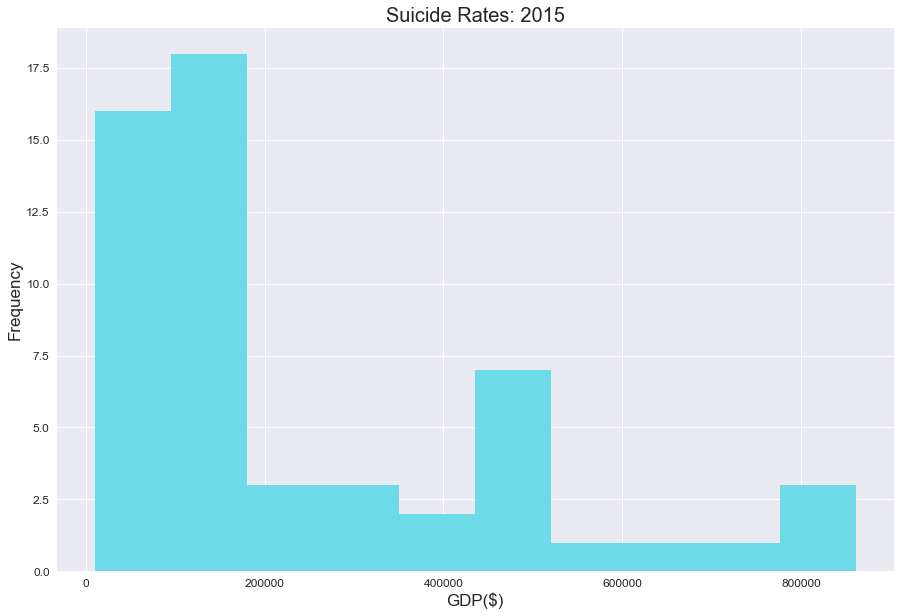

In [52]:
#regression plot for suicide rates vs gdp
x=dfcont["GdpPerCapital($)"]
plt.figure(figsize=(15,10))
plt.xlabel('GDP($)', fontsize = 17)
plt.ylabel('Frequency', fontsize = 17) #---total number of countries??
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Suicide Rates: 2015', fontsize= 20)
plt.savefig('Graphs/HistogramSuicideRates2015.png')
plt.hist(x)

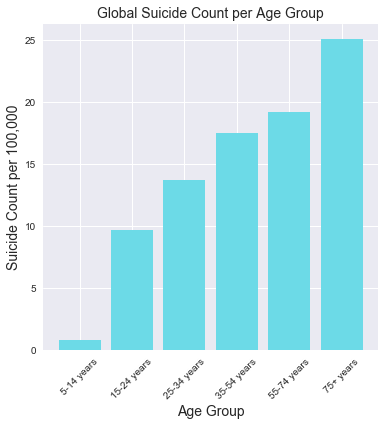

In [53]:
curr = global_suicide_data.groupby(['Age']).sum().reset_index()
xticks = [2, 3, 4, 1, 5, 6]

curr['order'] = xticks
curr = curr.sort_values(['order'], ascending=True).reset_index(drop=True)
curr

plt.figure(figsize=(6,6))
#curr = global_suicide_data.groupby(['Age']).sum().reset_index()
plt.bar(curr['Age'].values, curr['SuicidesNo'].values * 100000 / curr['Population'].values)
plt.title('Global Suicide Count per Age Group', fontsize = 14)
plt.xlabel('Age Group', fontsize = 14)
plt.ylabel('Suicide Count per 100,000', fontsize = 14)
plt.xticks(rotation = 45)
plt.savefig('Graphs/BarGraphAgeSuicideRates.png') #----saving image
plt.show()

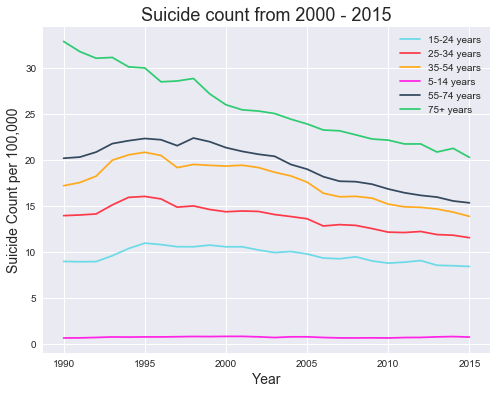

In [54]:
curr = global_suicide_data.groupby(['Year', 'Age']).sum().reset_index()
plt.figure(figsize = (8,6))
for age_group in curr['Age'].unique():
    sub = curr[curr['Age'] == age_group]
    sub['per_100k'] = sub['SuicidesNo'] * 100000 / sub['Population']
    plt.plot(sub['Year'], sub['per_100k'], label = age_group)

plt.title('Suicide count from 2000 - 2015', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Suicide Count per 100,000', fontsize = 14)
plt.legend()
plt.savefig('Graphs/CountryLineSuicideRates.png') #----saving image
plt.savefig('Graphs/LineAgeSuicideRates.png')
plt.show()
##legenddddd


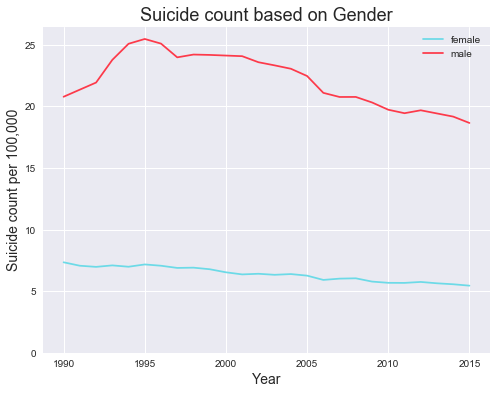

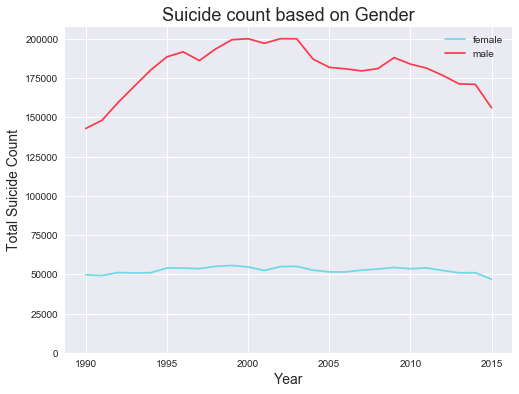

In [55]:
curr = global_suicide_data[(global_suicide_data['SuicidesNo'] != np.NaN) & (global_suicide_data['Population'] != np.NaN)]
curr = global_suicide_data.groupby(['Year', 'Gender']).sum().reset_index()
plt.figure(figsize = (8,6))
for sex in curr['Gender'].unique():
    sub = curr[curr['Gender'] == sex]
    sub['per_100k'] = sub['SuicidesNo'] * 100000 / sub['Population']
    plt.plot(sub['Year'], sub['per_100k'], label = sex)

plt.title('Suicide count based on Gender', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Suicide count per 100,000', fontsize = 14)
plt.ylim(bottom = 0)
plt.legend()
plt.show()

plt.figure(figsize = (8,6))
for sex in curr['Gender'].unique():
    sub = curr[curr['Gender'] == sex]
    plt.plot(sub['Year'], sub['SuicidesNo'], label = sex)

plt.title('Suicide count based on Gender', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Total Suicide Count', fontsize = 14)
plt.ylim(bottom = 0)
plt.legend()
plt.savefig('Graphs/LineGenderSuicideRates.png') #----saving image --- pick one graph??
plt.show()

In [56]:

# Generate pie plot showing the distribution of female versus male suicide percent
suicide_gender = global_suicide_data.groupby("Gender")

gender_suicide_percent = 100*suicide_gender['SuicidesNo'].sum()/global_suicide_data['SuicidesNo'].sum()
gender_suicide_percent

Gender
female    22.534089
male      77.465911
Name: SuicidesNo, dtype: float64

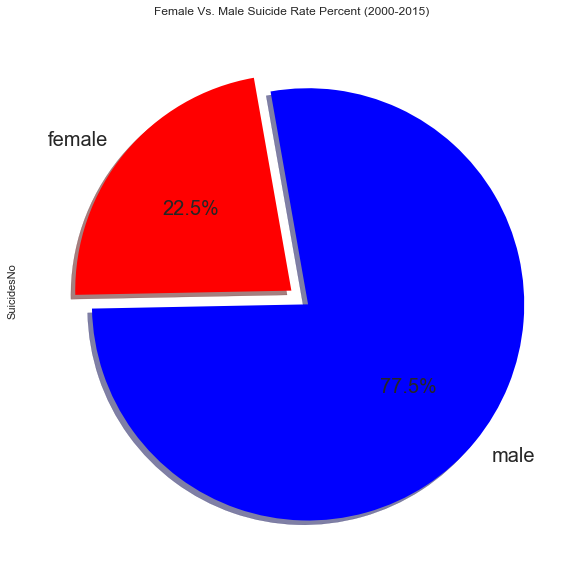

In [57]:

# Pie Plot
suicide_vs_age = gender_suicide_percent.plot(kind='pie', y='Gender', title="Female Vs. Male Suicide Rate Percent (2000-2015)",\
                startangle=100, autopct='%1.1f%%',shadow=True, fontsize=20, colors =["r","b"],legend =False, explode =(0, 0.1))
plt.tight_layout()
plt.savefig('Graphs/PieGenderSuicideRates.png') #----saving image
plt.show()